In [1]:
import context
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
from numba import cuda 

import src.data.data_preprocessing as util
import src.models.lstm_model as lstm_vanilla # data baseline, pretrain, hybrid
import src.models.loss_lstm_model as lstm_loss # loss
import src.models.architecture_lstm_model as lstm_arch # architecture
import src.models.lstm_residual_model as lstm_residual # residual




os.environ["CUDA_VISIBLE_DEVICES"]="0"
tf.compat.v1.set_random_seed(1)

2024-05-08 14:09:30.431714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 14:09:30.548415: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 14:09:30.946608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:$LD_LIBRARY_PATH:/home/i40/bielskip/miniconda3/envs/battery-system/lib/
2024-05-08 14:09:30.946659: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic lib

In [2]:
# current, charge, init_vol, ocv, theory, residual
feature_indices = {'current': 0, 'charge': 1, 'init_vol':2, 'ocv': 3, 'theory': 4, 'residual': 5}

# Define the features you want to select
selected_features =  ['current', 'charge']
# selected_features =  ['current', 'charge', 'init_vol', 'ocv']
# selected_features =  ['current', 'charge', 'init_vol', 'ocv', 'theory']

In [3]:
# load general hyperparameters
HYPER_PARAMS =  np.load('../../../models/training_setup/hyperparameters.npy', allow_pickle=True)
HYPER_PARAMS = HYPER_PARAMS.item()

# add aditional model-spefic hyperparameters
model_hyperparameters = {
    'n_features': len(selected_features),                  # number of input features
    'd_t': 0.25,                       # current integration factor
    'theory_model': 2228,             # the unique thevenin model ID for which the parameters have been computed
    'n_epochs': 20,
    'lr': 0.001,
    'loss_funcs': ['mse', 'soc'],  # loss functions
    'lambda_mse': 1,               # mse weighting factor
    'lambda_soc': 2,               # approximation loss weighting factor
}

# update hyperparameters
HYPER_PARAMS.update(model_hyperparameters)

In [4]:
# load training sets dictionary
TRAINING_SETS =  np.load('../../../models/training_setup/training_sets.npy', allow_pickle=True)
TRAINING_SETS = TRAINING_SETS.item()

# select correct training set
training_sets = TRAINING_SETS['10A_all']

    
X_list, y_list, scalers_train,  = util.prepare_all_features_input(HYPER_PARAMS, training_sets, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])

In [9]:
# Get the corresponding indices from the dictionary
feature_idx = [feature_indices[feature] for feature in selected_features]

# Iterate through the list of arrays and select desired features
X_list_features = []
for array in X_list:
    X_list_features.append(array[:, :, feature_idx])

# X_list_features = [X_list[0][:, :, feature_idx]]
    
 



In [6]:
#LSTM pretrained
# lstm = lstm_vanilla.Model()
# lstm.initialize(HYPER_PARAMS)


# y_list_pretrain = []
# for array in X_list:
#     y_list_pretrain.append(array[:, 99, 4]) # Theory model

# # pretrain
# fig = lstm.train_f(X_list_features, y_list_pretrain, scalers_train, half_train=True) # train half the epochs
# # rest train
# fig = lstm.train_f(X_list_features, y_list, scalers_train, half_train=True)



In [7]:
# LSTM loss
# lstm = lstm_loss.Model()
# lstm.initialize(HYPER_PARAMS, scalers_train)

In [8]:
# Data baseline LSTM
# lstm = lstm_vanilla.Model()
# lstm.initialize(HYPER_PARAMS)

In [9]:
# # model architecture LSTM
# lstm = lstm_arch.Model()
# lstm.initialize(HYPER_PARAMS)
# cond_train = []
# for array in X_list:
#     cond_train.append(array[:, 98:99, 2]) # init_vol
    
# X_list_features_cond_train = []

# X_list_features_cond_train = [[X_list_features[idx], cond_train[idx]] for idx in range(len(cond_train))]

# fig = lstm.train_f(X_list_features_cond_train, y_list, scalers_train)
# case_1_mse, case_2_mse, case_3_mse, fig = lstm.test_usecases([X_case_1[0][:, :, feature_idx], X_case_1[0][:, 98:99, 2]], y_case_1[0], [X_case_2[0][:, :, feature_idx], X_case_2[0][:, 98:99, 2]], y_case_2[0], [X_case_3[0][:, :, feature_idx], X_case_3[0][:, 98:99, 2]], y_case_3[0], scalers_train)


2024-05-07 17:17:52.159115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 17:17:52.181197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 17:17:52.181409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 17:17:52.182245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
# # Residual
# lstm = lstm_residual.Model()
# lstm.initialize(HYPER_PARAMS)

# residual_y_list = []
# for array in X_list:
#     residual_y_list.append(array[:, 98:99, 5]) # residual    
    
# fig = lstm.train_f(X_list_features, residual_y_list, scalers_train)
# case_1_mse, case_2_mse, case_3_mse, fig = lstm.test_usecases(X_case_1[0][:, :, feature_idx], y_case_1[0], X_case_1[0][:, 98:99, 4], X_case_2[0][:, :, feature_idx], y_case_2[0], X_case_2[0][:, 98:99, 4], X_case_3[0][:, :, feature_idx], y_case_3[0], X_case_3[0][:, 98:99, 4], scalers_train)
    



2024-05-07 16:42:49.614778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 16:42:49.636798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 16:42:49.637016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-07 16:42:49.637490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Residual_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 20)           2000      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


/home/i40/bielskip/miniconda3/envs/battery-system/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2024-05-07 16:52:18.782070: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2024-05-07 16:52:19.216977: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


epoch: 0, loss: 0.017316001137563337
epoch: 1, loss: 0.0014467148672944556
epoch: 2, loss: 0.001682969033330058
epoch: 3, loss: 0.0010185692905603598
epoch: 4, loss: 0.0012197037431178614
epoch: 5, loss: 0.0008096963986948443
epoch: 6, loss: 0.00046803622293130803
epoch: 7, loss: 0.000716064981437133
epoch: 8, loss: 0.0008498177679333215
epoch: 9, loss: 0.0004899315147971114
epoch: 10, loss: 0.0004862425582056555
epoch: 11, loss: 0.0004835562734418393
epoch: 12, loss: 0.0006075913358169297
epoch: 13, loss: 0.00033213554221826297
epoch: 14, loss: 0.0005576215565573269
epoch: 15, loss: 0.0004226976161589846
epoch: 16, loss: 0.00035007531065881875
epoch: 17, loss: 0.00039953337667005445
epoch: 18, loss: 0.00038876918066913885
epoch: 19, loss: 0.0006418953659400964


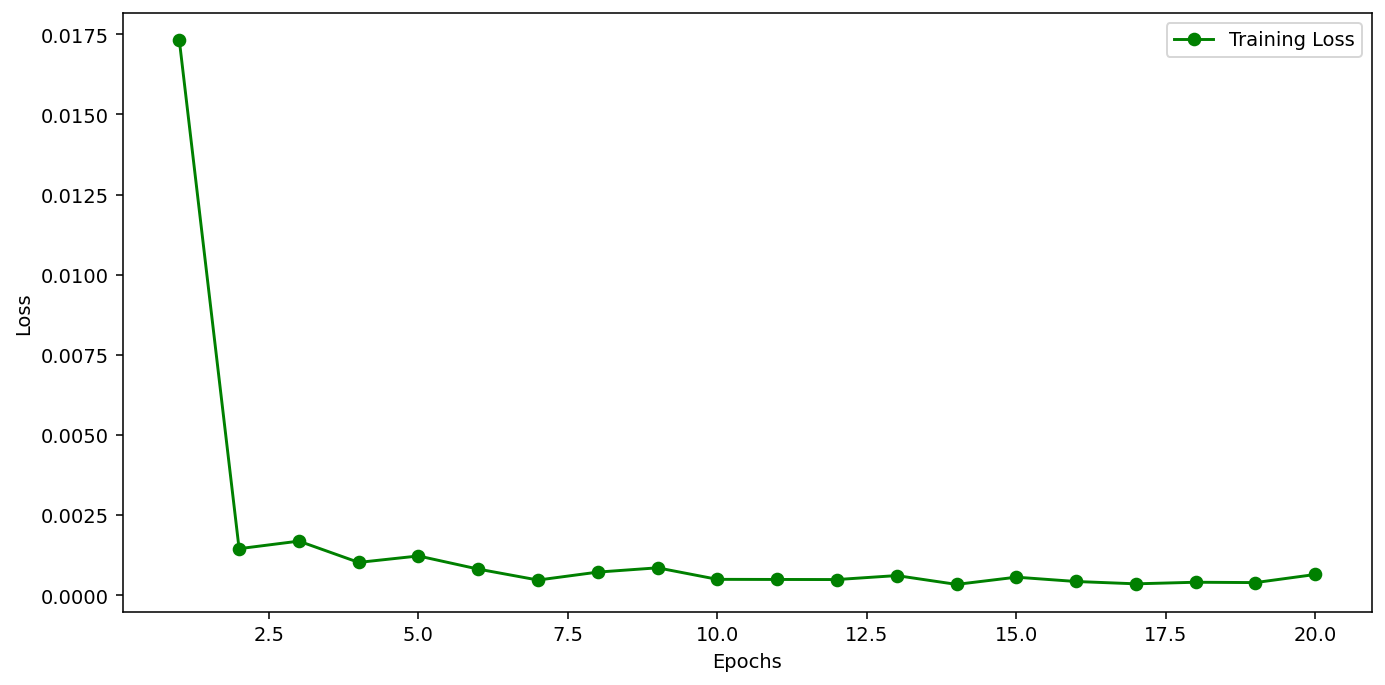

<Figure size 640x480 with 0 Axes>

In [9]:
fig = lstm.train_f(X_list_features, y_list, scalers_train)

# save model and hyperparameters
MODEL_ID = str(np.random.randint(10000))

lstm.model.save('../../../models/DS/' + str(MODEL_ID))
np.save('../../../models/DS/' + str(MODEL_ID) + '/hyperparameters', HYPER_PARAMS)
fig.savefig('../../../reports/figures/data_baseline-' + str(MODEL_ID) + '-learning_curve.png')

In [11]:
# load test sets dictionary
TEST_SETS =  np.load('../../../models/training_setup/test_sets.npy', allow_pickle=True)
TEST_SETS = TEST_SETS.item()

# select needed test profiles
test_profiles_usecase_1 = TEST_SETS['Reproduction']
test_profiles_usecase_2 = TEST_SETS['Abstraction']
test_profiles_usecase_3 = TEST_SETS['Generalization']

X_case_1, y_case_1, _  = util.prepare_all_features_input(HYPER_PARAMS, test_profiles_usecase_1, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_case_2, y_case_2, _  = util.prepare_all_features_input(HYPER_PARAMS, test_profiles_usecase_2, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
X_case_3, y_case_3, _  = util.prepare_all_features_input(HYPER_PARAMS, test_profiles_usecase_3, HYPER_PARAMS['stack'], HYPER_PARAMS['cell'])
    



47/47 [==============================] - 0s 5ms/step
Prediction time on Use Case 1:  0.229s
97/97 [==============================] - 0s 5ms/step
Prediction time on Use Case 2:  0.457s
50/50 [==============================] - 0s 5ms/step
Prediction time on Use Case 3:  0.24s
##############################################################
             Use Case 1    Use Case 2    Use Case 3
---------  ------------  ------------  ------------
MSE  (μV)       70.4          14            24.4
MAE  (V)         0.008         0.0029        0.0046
MaxE (V)         0.0177        0.0204        0.0144
##############################################################


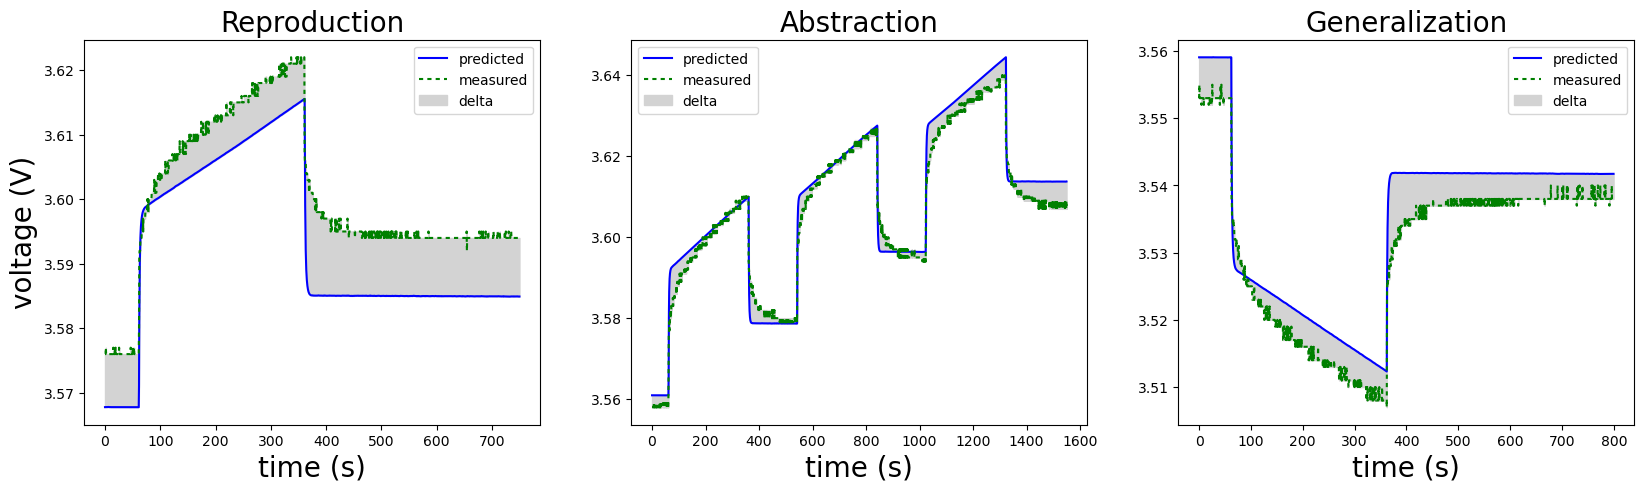

In [11]:
case_1_mse, case_2_mse, case_3_mse, fig = lstm.test_usecases(X_case_1[0][:, :, feature_idx], y_case_1[0], X_case_2[0][:, :, feature_idx], y_case_2[0], X_case_3[0][:, :, feature_idx], y_case_3[0], scalers_train)
